In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import random



In [20]:
IMG_SIZE = 50

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
lablelist = os.listdir('/content/drive/My Drive/Colab Notebooks/facemask')

In [4]:
masklist = os.listdir('/content/drive/My Drive/Colab Notebooks/facemask/with mask')
withoutmasklist = os.listdir('/content/drive/My Drive/Colab Notebooks/facemask/without mask')

In [11]:
mask_path = '/content/drive/My Drive/Colab Notebooks/facemask/with mask/'
withoutmask_path = '/content/drive/My Drive/Colab Notebooks/facemask/without mask/'

In [ ]:
############# MASK DATA
mask_data = []
mask_lable = []
for mask in tqdm(masklist):
  image_path = mask_path + mask
  img_array = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
  mask_data.append([new_array,[1,0]])

100%|██████████| 690/690 [03:40<00:00,  3.13it/s]


In [9]:
#######For testing purpose of mask
mask_test = []
img1 = mask_path + '6-with-mask.jpg'
img_array = cv2.imread(img1,cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
mask_test.append([new_array])
mask_test1 = np.array(mask_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
mask_test1 = mask_test1/255.0

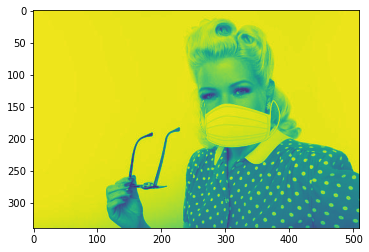

In [10]:
plt.imshow(img_array)
plt.show()

In [ ]:
print(mask_data[0][1])

[1, 0]


[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 254, 225, ..., 241, 249, 252],
       [254, 252, 200, ...,  33,  46,  63],
       ...,
       [254, 253, 230, ..., 255, 255, 255],
       [255, 250, 145, ..., 255, 255, 255],
       [255, 253,  55, ..., 255, 255, 253]], dtype=uint8), [1, 0]]


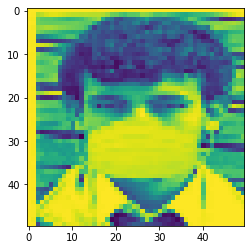

numpy.ndarray

In [ ]:
print(mask_data[0])
import matplotlib.pyplot as plt
plt.imshow(mask_data[0][0])
plt.show()
type(new_array)

In [ ]:
print(mask_data[689])

[array([[ 49,  43,  39, ..., 153, 142, 246],
       [ 33,  26,  26, ..., 110, 242, 224],
       [ 29,  19,  39, ..., 119, 162, 253],
       ...,
       [231,  79, 221, ..., 233, 187, 231],
       [ 93, 201, 219, ..., 224, 228, 240],
       [ 86, 223, 208, ..., 234, 233, 232]], dtype=uint8), [1, 0]]


In [ ]:
################ NON MASK DATA
non_mask_data = []
non_mask_lable = []
for no_mask in tqdm(withoutmasklist):
  image_path = withoutmask_path + no_mask
  img_array = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
  non_mask_data.append([new_array,[0,1]])

100%|██████████| 686/686 [03:38<00:00,  3.14it/s]


In [19]:
#######For testing purpose of mask
Nomask_test = []
impath = withoutmask_path + '2.jpg'
img_array = cv2.imread(impath,cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
Nomask_test.append([new_array])
Nomask_test1 = np.array(Nomask_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Nomask_test1 = Nomask_test1/255.0

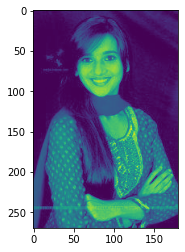

In [ ]:
plt.imshow(img_array)
plt.show()

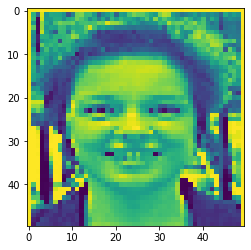

In [ ]:
plt.imshow(non_mask_data[685][0])

In [ ]:
Training_data = mask_data + non_mask_data

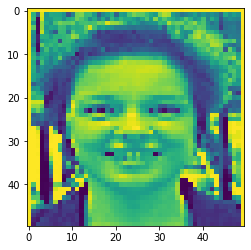

In [ ]:
plt.imshow(Training_data[1375][0])
plt.show()

In [ ]:
random.shuffle(Training_data)


In [ ]:
x_train = []
y_train = []
for t_data in Training_data:
  x_train.append(t_data[0])
  y_train.append(t_data[1])

In [ ]:
print(y_train[0])

[1, 0]


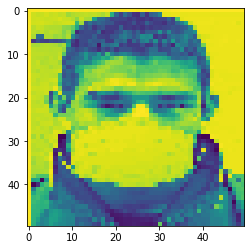

In [ ]:
plt.imshow(x_train[0])
plt.show()

In [ ]:
x_train = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y_train = np.array(y_train)

x_train = x_train/255.0




In [ ]:
x_train.shape

(1376, 50, 50, 1)

IndexError: ignored

In [ ]:
#convolutional neural network
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Activation,MaxPooling2D,Flatten,Dropout
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split


In [ ]:
x_train,y_train

(array([[[[0.99607843],
          [0.99607843],
          [0.99607843],
          ...,
          [1.        ],
          [1.        ],
          [1.        ]],
 
         [[0.99215686],
          [0.9254902 ],
          [0.91372549],
          ...,
          [0.96862745],
          [0.96862745],
          [0.96862745]],
 
         [[0.99607843],
          [0.9254902 ],
          [0.92941176],
          ...,
          [0.97254902],
          [0.97254902],
          [0.97254902]],
 
         ...,
 
         [[1.        ],
          [0.64705882],
          [0.63137255],
          ...,
          [0.22745098],
          [0.09019608],
          [0.41568627]],
 
         [[1.        ],
          [0.64313725],
          [0.57647059],
          ...,
          [0.2627451 ],
          [0.10588235],
          [0.39607843]],
 
         [[0.99607843],
          [0.63529412],
          [0.50588235],
          ...,
          [0.29803922],
          [0.17254902],
          [0.34901961]]],
 
 
        [

In [ ]:
model = Sequential()

model.add(Conv2D(200, (3,3), input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(200, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

checkpoint = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/facemask_model.model',monitor='val_loss',verbose = 0, save_best_only=True,mode ='auto')

#train_data,test_data,train_target,test_target = train_test_split(x_train,y_train,test_size = 0.1)

model.fit(x_train,y_train,callbacks=[checkpoint],validation_split=0.2,batch_size = 32,epochs=20)

Train on 1100 samples, validate on 276 samples
Epoch 1/20
1100/1100 [==============================] - 29s 27ms/step - loss: 0.6885 - accuracy: 0.5645 - val_loss: 0.6014 - val_accuracy: 0.6630
Epoch 2/20
1100/1100 [==============================] - 29s 26ms/step - loss: 0.6028 - accuracy: 0.6664 - val_loss: 0.4246 - val_accuracy: 0.8478
Epoch 3/20
1100/1100 [==============================] - 30s 27ms/step - loss: 0.3847 - accuracy: 0.8391 - val_loss: 0.2198 - val_accuracy: 0.9457
Epoch 4/20
1100/1100 [==============================] - 29s 27ms/step - loss: 0.2623 - accuracy: 0.8927 - val_loss: 0.1832 - val_accuracy: 0.9420
Epoch 5/20
1100/1100 [==============================] - 29s 27ms/step - loss: 0.1963 - accuracy: 0.9282 - val_loss: 0.2640 - val_accuracy: 0.9094
Epoch 6/20
1100/1100 [==============================] - 29s 27ms/step - loss: 0.1491 - accuracy: 0.9400 - val_loss: 0.1281 - val_accuracy: 0.9674
Epoch 7/20
1100/1100 [==============================] - 29s 27ms/step - loss:

In [ ]:
os.listdir('/content/drive/My Drive/Colab Notebooks')

['Deep Learning_Ann1_mnist dataset',
 'Cat_dog_test',
 'Cat_dog_train',
 'practise.ipynb',
 'dog-cat.model',
 'x.pickle',
 'y.pickle',
 'dog-cat1.model',
 'facemask',
 'Untitled1.ipynb',
 'facemask_model.model',
 'Untitled0.ipynb',
 'Facemaskdetection.ipynb']

In [20]:
from keras.models import load_model
model = load_model("/content/drive/My Drive/Colab Notebooks/facemask_model.model")
prediction = model.predict(Nomask_test1.reshape(-1,IMG_SIZE,IMG_SIZE,1))


In [21]:
prediction

array([[8.9154688e-05, 9.9991083e-01]], dtype=float32)

In [ ]:
prediction = model.predict(mask_test1.reshape(-1,IMG_SIZE,IMG_SIZE,1))

In [ ]:
prediction

array([[0.99577266, 0.00422734]], dtype=float32)